In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/dataframe.pkl', 'rb') as file:
    df = pickle.load(file)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4646773 entries, 0 to 4646773
Data columns (total 27 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FlagImpaye       category      
 1   Montant          float64       
 2   DateTransaction  datetime64[ns]
 3   CodeDecision     object        
 4   VerifianceCPT1   int64         
 5   VerifianceCPT2   int64         
 6   VerifianceCPT3   int64         
 7   D2CB             int64         
 8   ScoringFP1       float64       
 9   ScoringFP2       float64       
 10  ScoringFP3       float64       
 11  TauxImpNb_RB     float64       
 12  TauxImpNB_CPM    float64       
 13  EcartNumCheq     int64         
 14  NbrMagasin3J     int64         
 15  DiffDateTr1      float64       
 16  DiffDateTr2      float64       
 17  DiffDateTr3      float64       
 18  CA3TRetMtt       float64       
 19  CA3TR            float64       
 20  Heure            int64         
 21  Year             int64         

In [8]:
import plotly.express as px
import pandas as pd

# Supposons que votre DataFrame soit appelé df
# Remplacez 'FlagImpaye' par le nom de votre colonne cible

fig = px.pie(df, names='FlagImpaye', title='Distribution de la classe FlagImpaye')
fig.show()


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-10-683b1fb64dad>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



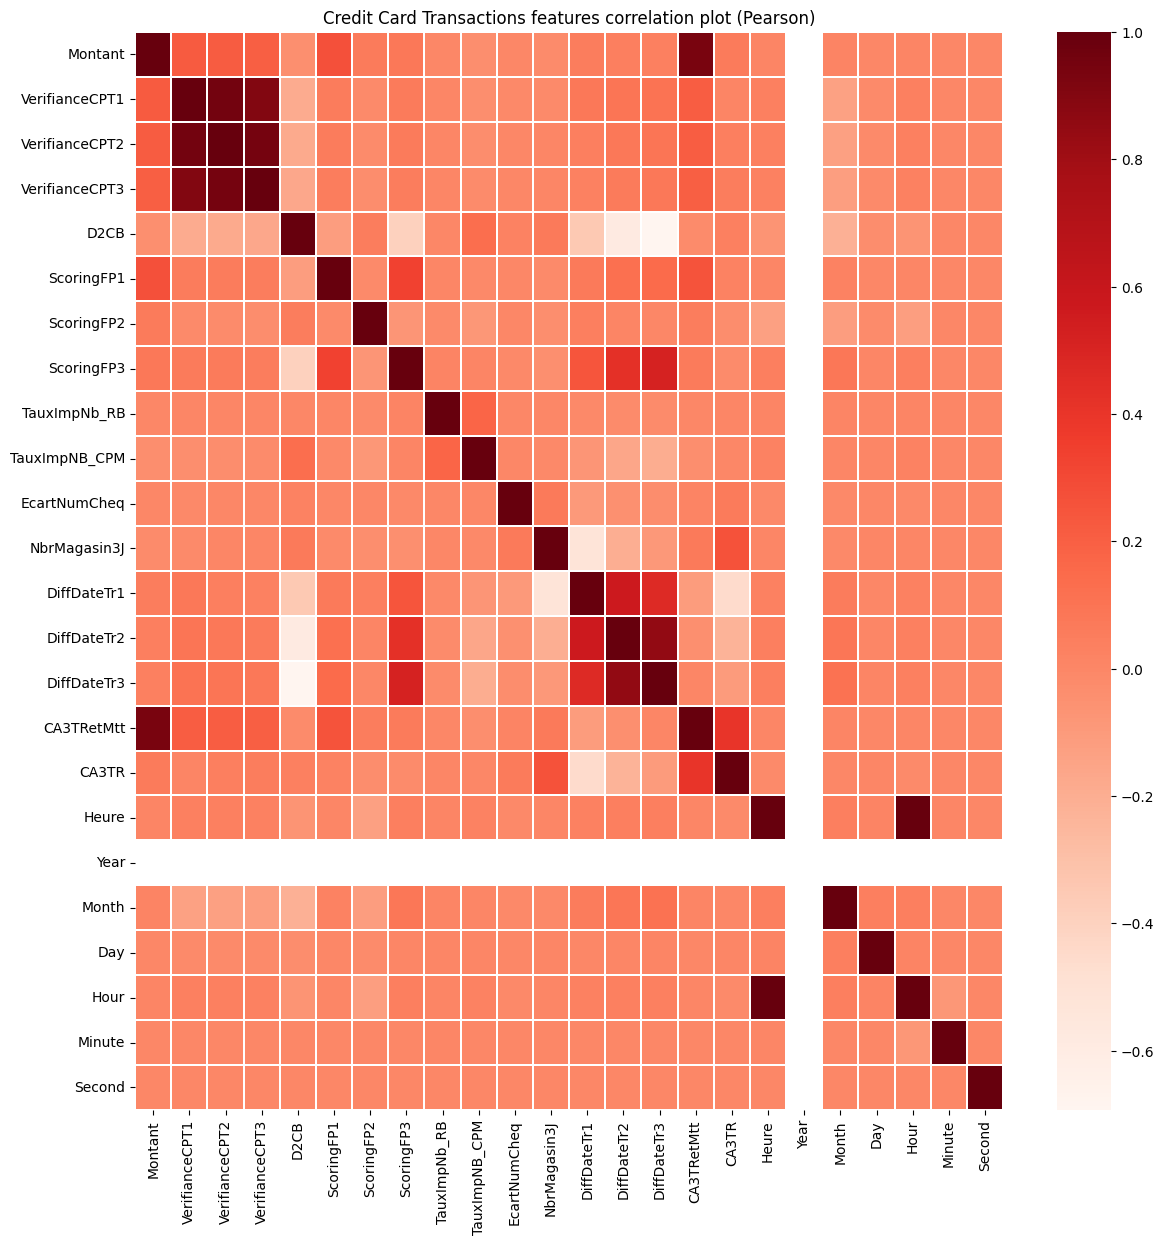

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="Reds")
plt.show()


<Axes: xlabel='FlagImpaye', ylabel='Montant'>

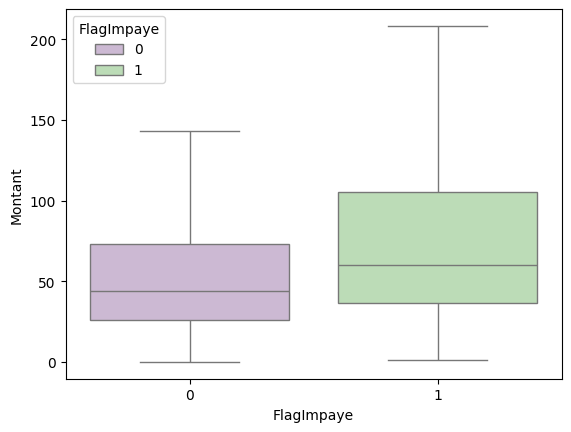

In [11]:
sns.boxplot(x="FlagImpaye", y="Montant", hue="FlagImpaye",data=df, palette="PRGn",showfliers=False)

In [28]:
df.DateTransaction.max()-df.DateTransaction.min()

Timedelta('302 days 14:34:59')

In [27]:
df.head()

,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Year,Month,Day,Hour,Minute,Second
0,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,0.000000,0.000000,...,4.0,20.00,0.00,27134,2017,2,1,7,32,14
1,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,0.000000,0.000000,...,4.0,28.61,8.61,27817,2017,2,1,7,43,37
2,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,0.000000,0.000000,...,4.0,57.64,0.00,28058,2017,2,1,7,47,38
3,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,0.000000,0.000000,...,4.0,54.29,0.00,28128,2017,2,1,7,48,48
4,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,0.003769,8.586333,...,4.0,59.15,32.25,29607,2017,2,1,8,13,27


In [37]:

df_grouped = df.groupby(['Hour', 'FlagImpaye']).agg({
    'Montant': ['count','mean', 'sum', 'median']
})
# 'mean', 'sum', 'median' sont les opérations d'agrégation que vous souhaitez appliquer

# Afficher le nouveau DataFrame groupé
print(df_grouped)

                Montant                                  
                  count        mean          sum   median
Hour FlagImpaye                                          
5    0                5   31.900000       159.50   31.900
     1                0         NaN         0.00      NaN
6    0               14   62.012857       868.18   31.900
     1                0         NaN         0.00      NaN
7    0              450  140.420978     63189.44   32.100
     1                4   53.995000       215.98   55.500
8    0            52558   44.777286   2353404.59   31.715
     1              301   58.325914     17556.10   40.020
9    0           326312   54.754709  17867118.58   40.940
     1             1588   77.460963    123008.01   50.000
10   0           490288   59.419260  29132550.08   43.800
     1             2028   88.112890    178692.94   55.105
11   0           532074   60.867650  32386094.27   44.760
     1             2668   86.736121    231411.97   56.800
12   0        

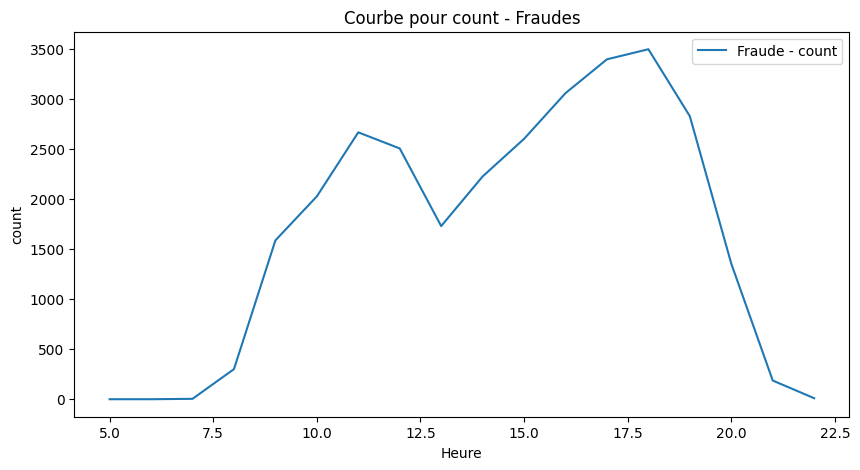

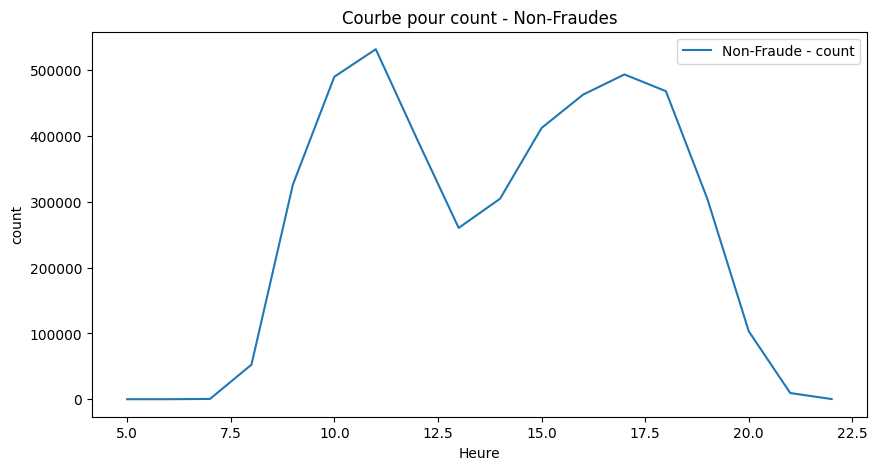

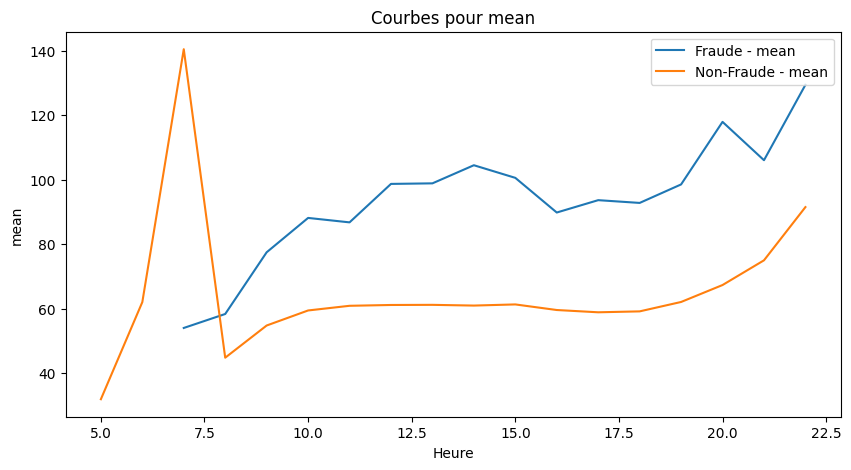

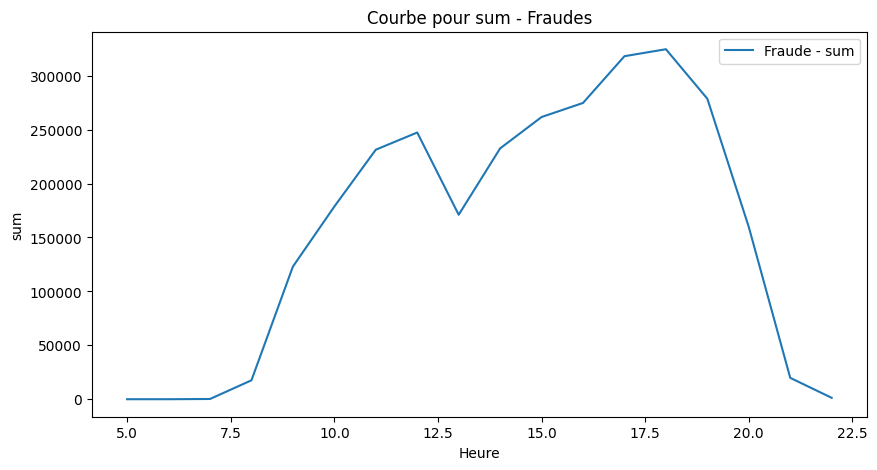

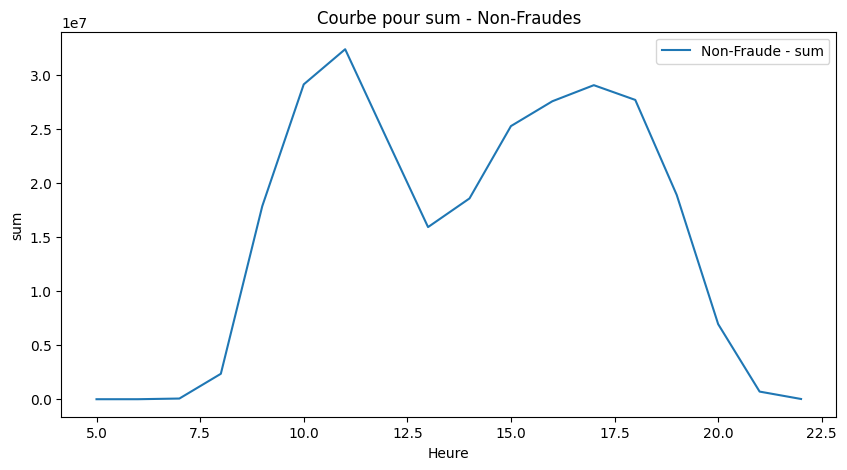

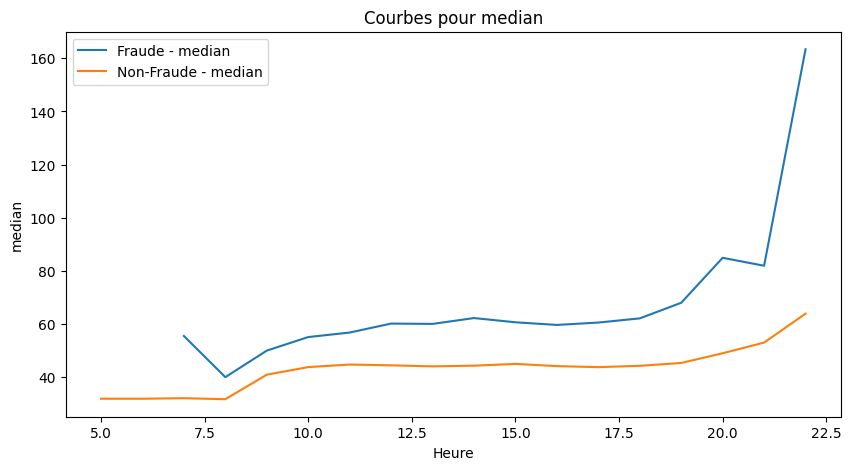

In [51]:
import matplotlib.pyplot as plt

# Supposons que 'df_grouped' soit votre DataFrame groupé
# Assurez-vous que 'FlagImpaye' est une colonne binaire (0 ou 1)

# Liste des opérations d'agrégation
aggregations = ['count', 'mean', 'sum', 'median']

# Parcourir les opérations d'agrégation
for aggregation in aggregations:
    # Créer un sous-DataFrame pour l'opération d'agrégation actuelle
    df_agg = df_grouped['Montant', aggregation].unstack()

    # Vérifier si l'opération est 'count' ou 'sum'
    if aggregation in ['count', 'sum']:
        # Créer un nouveau plot pour les fraudes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg.index, df_agg[1], label=f'Fraude - {aggregation}')
        plt.title(f'Courbe pour {aggregation} - Fraudes')
        plt.xlabel('Heure')
        plt.ylabel(aggregation)
        plt.legend()
        plt.show()

        # Créer un nouveau plot pour les non-fraudes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg.index, df_agg[0], label=f'Non-Fraude - {aggregation}')
        plt.title(f'Courbe pour {aggregation} - Non-Fraudes')
        plt.xlabel('Heure')
        plt.ylabel(aggregation)
        plt.legend()
        plt.show()
    else:
        # Pour les autres opérations, créer un seul plot pour les deux classes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg.index, df_agg[1], label=f'Fraude - {aggregation}')
        plt.plot(df_agg.index, df_agg[0], label=f'Non-Fraude - {aggregation}')
        plt.title(f'Courbes pour {aggregation}')
        plt.xlabel('Heure')
        plt.ylabel(aggregation)
        plt.legend()
        plt.show()


In [61]:

df_grouped = df.groupby(['Month', 'FlagImpaye']).agg({
    'Montant': ['count','mean', 'sum', 'median']
})
# 'mean', 'sum', 'median' sont les opérations d'agrégation que vous souhaitez appliquer

# Afficher le nouveau DataFrame groupé
print(df_grouped)

                 Montant                                
                   count        mean          sum median
Month FlagImpaye                                        
2     0           834943   58.261892  48645358.92  43.19
      1             4058   89.751668    364212.27  59.43
3     0           906674   58.148128  52721395.57  43.46
      1             4815   90.816511    437281.50  57.90
4     0           921406   60.381606  55635973.99  45.00
      1             4685   86.112937    403439.11  59.77
5     0           359581   59.379729  21351822.33  43.48
      1             2794  100.509596    280823.81  60.06
6     0           298791   59.529034  17786739.66  42.21
      1             2388   99.979560    238751.19  60.31
7     0           285893   62.239036  17793704.81  44.61
      1             2430   93.608070    227467.61  61.19
8     0           268652   62.542219  16802092.29  46.01
      1             2252  100.521501    226374.42  61.59
9     0           250113   60.6

In [62]:
from plotly.offline import iplot
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go

# Liste des opérations d'agrégation
aggregations = ['count', 'mean', 'sum', 'median']

# Créer une figure avec des sous-plots
fig = sp.make_subplots(rows=len(aggregations), cols=1, subplot_titles=aggregations)

# Parcourir les opérations d'agrégation
for i, aggregation in enumerate(aggregations, start=1):
    # Créer un sous-DataFrame pour l'opération d'agrégation actuelle
    df_agg = df_grouped['Montant', aggregation].unstack()

    # Tracer la courbe pour les fraudes (FlagImpaye == 1)
    trace_fraud = go.Scatter(x=df_agg.index, y=df_agg[1], mode='lines', name=f'Fraude - {aggregation}')

    # Tracer la courbe pour les non-fraudes (FlagImpaye == 0)
    trace_non_fraud = go.Scatter(x=df_agg.index, y=df_agg[0], mode='lines', name=f'Non-Fraude - {aggregation}')

    # Ajouter les traces aux sous-plots correspondants
    fig.add_trace(trace_fraud, row=i, col=1)
    fig.add_trace(trace_non_fraud, row=i, col=1)

    # Mettre à jour le titre du sous-plot
    fig.update_xaxes(title_text='Mois', row=i, col=1)
    fig.update_yaxes(title_text=aggregation, row=i, col=1)

# Mettre à jour le titre global de la figure
fig.update_layout(title_text='Courbes pour différentes opérations d\'agrégation')

# Afficher la figure
iplot(fig)


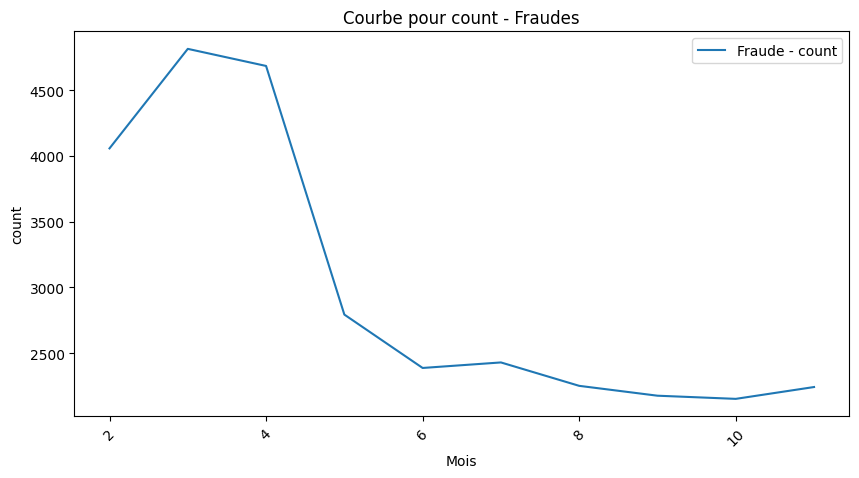

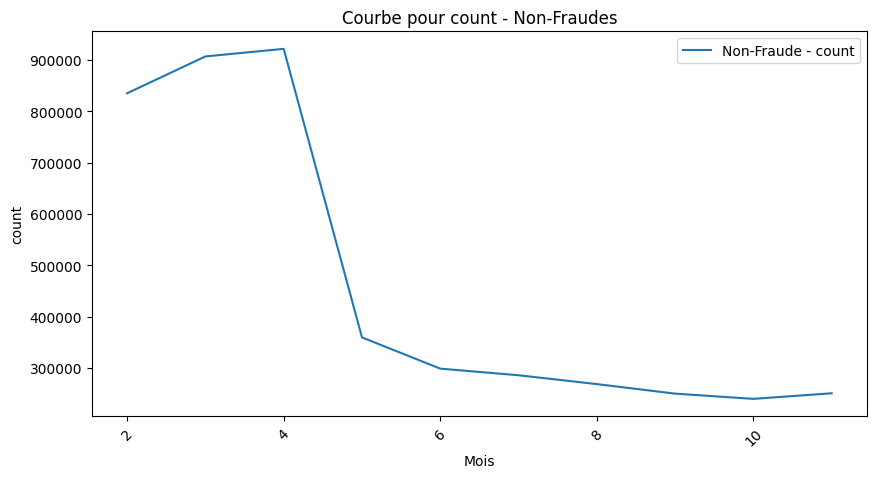

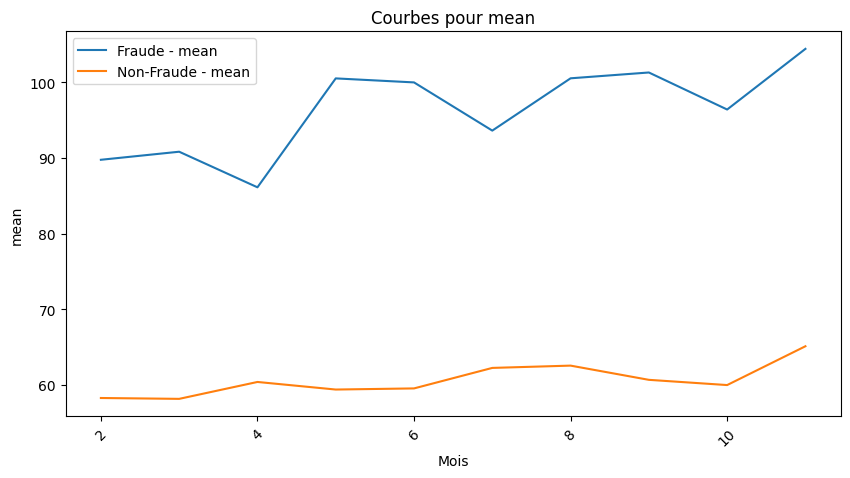

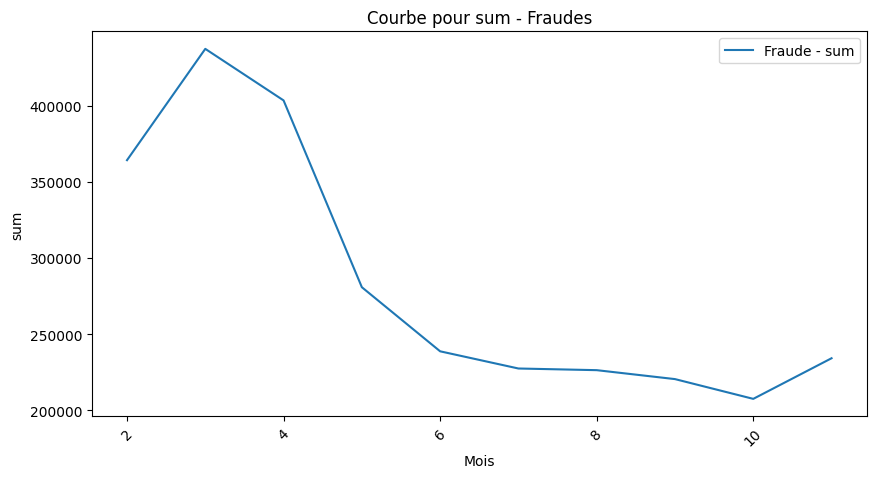

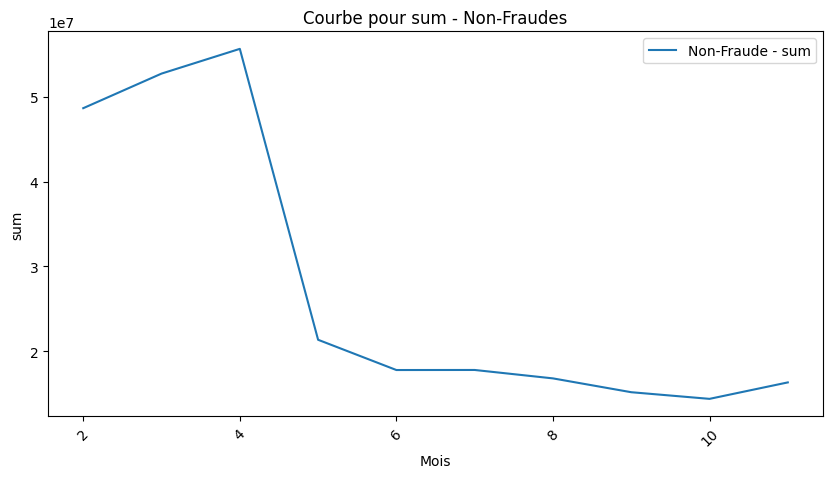

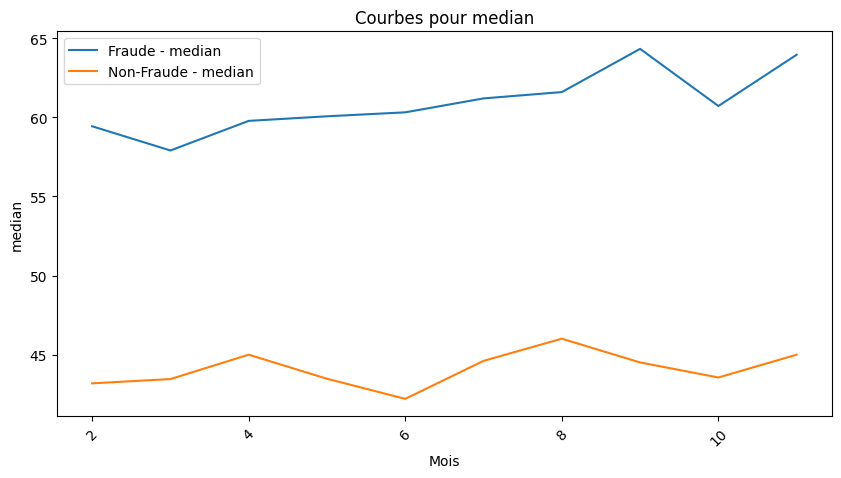

In [64]:
import matplotlib.pyplot as plt

# Liste des opérations d'agrégation
aggregations = ['count', 'mean', 'sum', 'median']

# Parcourir les opérations d'agrégation
for aggregation in aggregations:
    # Créer un sous-DataFrame pour l'opération d'agrégation actuelle
    df_agg = df_grouped['Montant', aggregation].unstack()

    # Vérifier si l'opération est 'count' ou 'sum'
    if aggregation in ['count', 'sum']:
        # Créer un nouveau plot pour les fraudes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg[1], label=f'Fraude - {aggregation}')
        plt.title(f'Courbe pour {aggregation} - Fraudes')
        plt.xlabel('Mois')
        plt.ylabel(aggregation)
        plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
        plt.legend()
        plt.show()

        # Créer un nouveau plot pour les non-fraudes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg[0], label=f'Non-Fraude - {aggregation}')
        plt.title(f'Courbe pour {aggregation} - Non-Fraudes')
        plt.xlabel('Mois')
        plt.ylabel(aggregation)
        plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
        plt.legend()
        plt.show()
    else:
        # Pour les autres opérations, créer un seul plot pour les deux classes
        plt.figure(figsize=(10, 5))  # Ajustez la taille du plot selon vos besoins
        plt.plot(df_agg[1], label=f'Fraude - {aggregation}')
        plt.plot(df_agg[0], label=f'Non-Fraude - {aggregation}')
        plt.title(f'Courbes pour {aggregation}')
        plt.xlabel('Mois')
        plt.ylabel(aggregation)
        plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
        plt.legend()
        plt.show()
